# Laboratorio 2: Exploración y Visualización de Datos
Fecha: Marzo 2025

Integrantes: Pablo Arroyo Martínez (Sección 2) // Natalia Valencia Valenzuela (Sección 2)


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. Puede ocupar Jupyter notebook en su computador o usar Google Colab como alternativa online.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

## Accidentes de tránsito

Para esta sección utilizaremos un dataset real de número de accidentes de tránsito por localidad, el cual puede ser encontrado en el siguiente link: http://datos.gob.cl/dataset/9348. Para cargar el dataset ejecute el siguiente código:

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
tipos = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/accidentes_2010_2011.txt", sep=" ")
tipos.head()

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
1,Nacional,Nacional,2010,Atropello,8247
2,Nacional,Nacional,2011,Atropello,8339
3,Regional,XV Región Arica y Parinacota,2010,Atropello,115
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
5,Comunal,ARICA,2010,Atropello,115


Explore el set de datos para responder las siguientes preguntas:

1. ¿Cuáles son las dimensiones del dataset (filas, columnas)?

In [78]:
tipos.shape

(4296, 5)

2. ¿Qué describe cada línea del dataset? (ejemplifique tomando el dato de la fila 235, extienda la descripción)

In [79]:
tipos.iloc[234, :]

Muestra            Comunal
Descripcion       PALMILLA
Anio                  2010
TipoAccidente    Atropello
Cantidad                 4
Name: 235, dtype: object

3. ¿Cuántos años diferentes abarca la información del dataset? Entregue un array con los años.


In [80]:
tipos["Anio"].unique()

array([2010, 2011], dtype=int64)

4. Filtre los datos para incluir sólo los accidentes ocurridos el año 2011 a nivel Regional. Luego, genere un gráfico de barras que muestre la cantidad de accidentes en cada Región. Comente sus principales observaciones y si considera que es razonable usar el conteo de frecuencias para determinar las regiones más peligrosas en cuanto a accidentes de tránsito.

    **OJO**: hay que sumar la cantidad de accidentes para los distintos tipos de accidente de una misma región

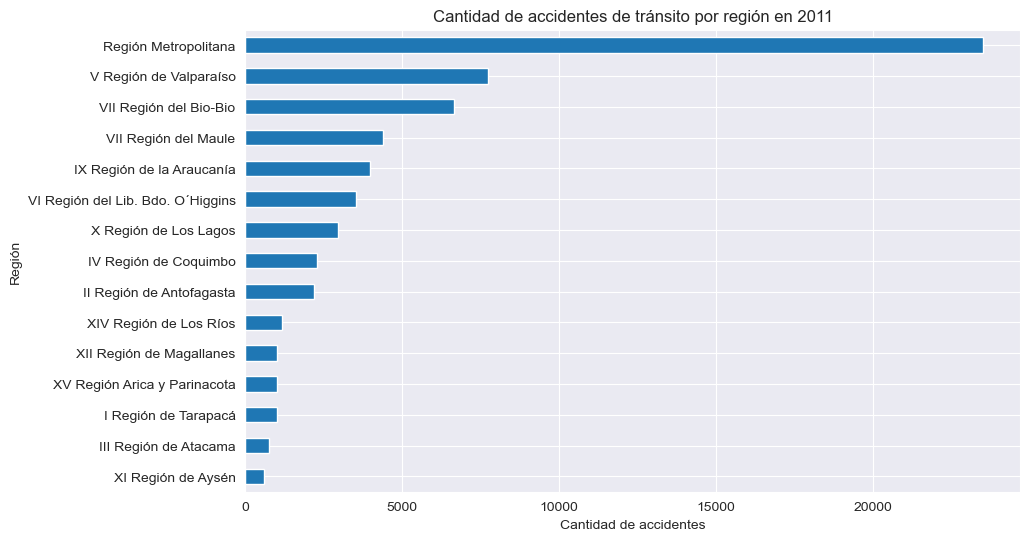

In [81]:
accidentes_2011_regional = tipos[(tipos["Anio"] == 2011) & (tipos["Muestra"] == "Regional")]
accidentes_por_region = accidentes_2011_regional.groupby("Descripcion")["Cantidad"].sum()

plt.figure(figsize=(10, 6))
accidentes_por_region.sort_values().plot(kind="barh")
plt.xlabel("Cantidad de accidentes")
plt.ylabel("Región")
plt.title("Cantidad de accidentes de tránsito por región en 2011")

plt.show()

R: La región metropolitana es con diferencia la región que más accidentes de tránsito ha registrado en 2011, y la región que ha registrado menos accidentes en 2011 es la región de Aysén. Con este gráfico no es posible determinar cuál ha sido la región más peligrosa en 2011 en cuanto a accidentes de tránsito, ya que la frecuencia de accidentes tiene mucho que ver con la población de cada región. Se tendría que relacionar los datos con la población de cada región, la cantidad de carreteras, vehículos, etc. para determinar la región más peligrosa.

5. Filtre los datos para incluir sólo los accidentes ocurridos el año 2010 a nivel regional. Genere un boxplot donde se indique la cantidad de accidentes categorizado por tipo de accidente. ¿Cuáles son sus principales observaciones?

<Figure size 1000x600 with 0 Axes>

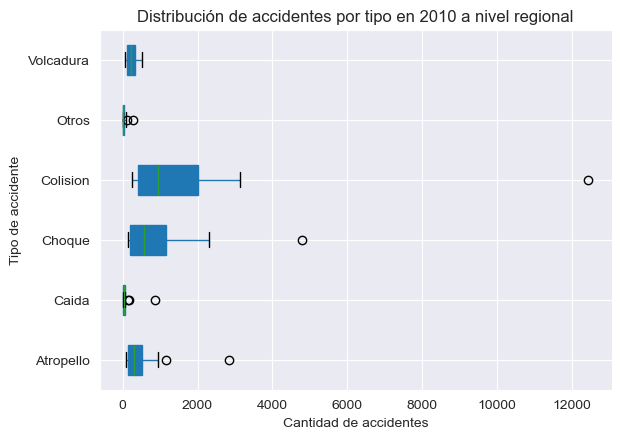

In [82]:
accidentes_2010_regional = tipos[(tipos["Anio"] == 2010) & (tipos["Muestra"] == "Regional")]

plt.figure(figsize=(10, 6))
accidentes_2010_regional.boxplot(column="Cantidad", by="TipoAccidente", vert=False, patch_artist=True)

plt.xlabel("Cantidad de accidentes")
plt.ylabel("Tipo de accidente")
plt.title("Distribución de accidentes por tipo en 2010 a nivel regional")
plt.suptitle("")

plt.show()

R: Los tipos de accidente "Colisión" y "Choque" poseen una distribución en términos de cantidad más amplia que el resto de tipos. Se ven algunos outliers, 2 en "otros", 1 en "choque", 2 en "caída", 2 en "atropello" y 1 en "colisión" el cual es el más notorio con un valor mayor a 12000. Cada boxplot muestra que el rango entre el primer y tercer cuartil está más pronunciado hacia la izquierda (rangos intercuartiles). Tipos como "caída" y "otros" tienen una distribución baja en cuanto a la cantidad de accidentes comparados a los otros tipos.

6. ¿Qué otra forma de explorar los datos podría agregar para el dataset de Accidentes de tránsito y qué información adicional aporta? Adjunte el código necesario.

<Figure size 1000x600 with 0 Axes>

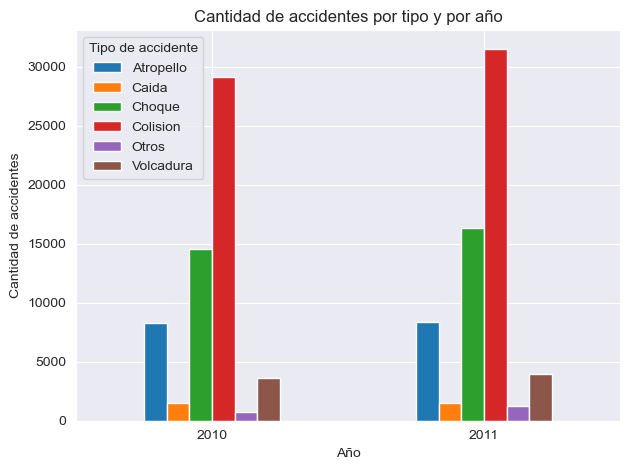

In [83]:
accidentes_2010_2011_regional = tipos[tipos["Muestra"] == "Regional"]
accidentes_por_tipo_anio = accidentes_2010_2011_regional.groupby(["Anio", "TipoAccidente"])["Cantidad"].sum().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
accidentes_por_tipo_anio.plot(kind="bar")

plt.xlabel("Año")
plt.ylabel("Cantidad de accidentes")
plt.title("Cantidad de accidentes por tipo y por año")
plt.legend(title="Tipo de accidente")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

R: Este gráfico nos permite comparar la cantidad de accidentes por tipo ocurridos en el año 2010 y 2011 (muestra regional). Se observa que tienen una tendencia similar, con las colisiones como más comunes y caídas/otros como las menos frecuentes.

## Diabetes
Considere el set de datos de pacientes para la predicción de diabetes con las siguientes columnas:

- gender: género del paciente
- age: edad del paciente
- hypertension: indica si el paciente tiene o no hipertensión
- heart_disease: indica si el paciente tiene o no enfermedad cardiaca
- smoking_history: indica si el paciente es o fue fumador
- bmi: indice de masa corporal del paciente
- HbA1c_level: Hemoglobina HbA1c del paciente
- blood_glucose_level: Nivel de glucosa en sangre del paciente
- diabetes: si el paciente tiene o no diabetes

In [84]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab1.2%202023-2/diabetes_prediction_dataset.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


7. Para explorar el dataset, realice un análisis de frecuencias de los atributos categóricos (categorías binarias y multiclase).



In [85]:
categorias_binarias = ['hypertension', 'heart_disease', 'diabetes']

for categoria in categorias_binarias:
    print(diabetes[categoria].value_counts())
    print("\n")

hypertension
0    92515
1     7485
Name: count, dtype: int64


heart_disease
0    96058
1     3942
Name: count, dtype: int64


diabetes
0    91500
1     8500
Name: count, dtype: int64




In [86]:
categorias_multiclase = ['gender', 'smoking_history']

for categoria in categorias_multiclase:
    print(diabetes[categoria].value_counts())
    print("\n")

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64




8. Muestre estadísticas de resumen para las variables numéricas y comenten sus observaciones.

In [87]:
variables_numericas = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

diabetes[variables_numericas].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


R: La media de edad de los pacientes es de 41.89 años aprox con desviación estandar de 22.52 aprox, lo que indica una distribución bastante dispersa. Se observa que entre los percentiles 25 y 75 (50% de la muestra) el rango de glucosa en la sangre es de (100-159) lo cual indica que al menos de la mitad de los pacientes tienen valores en el rango prediabético o diabético. Valor 0.08 como mínimo de edad, lo cual podría indicar un dato atípico.

# Clasificación

Ahora crearemos un clasificador binario (por ahora no importa cómo funciona), y veremos que tal es su desempeño decidiendo si una persona tiene diabetes o no.

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Droppear categoricas
df_clf = diabetes.drop(columns=['gender', 'smoking_history'])
# Separar atributos y target
X = df_clf.drop(columns=['diabetes'])
y = df_clf['diabetes']
# Separar conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Entrenar modelo
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
# Obtener predicciones
y_pred = clf.predict(X_test)

### Veamos su matríz de confusión

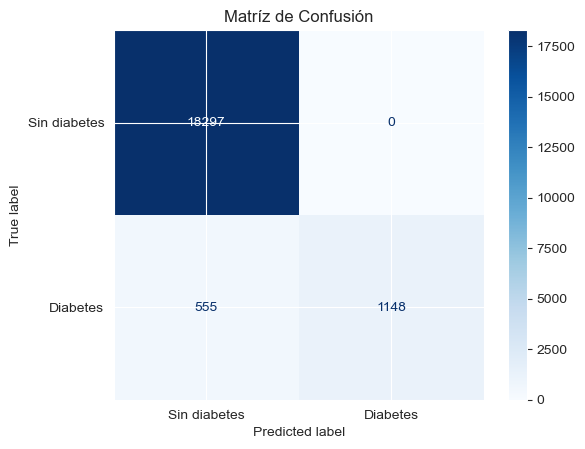

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Matríz de Confusión')
plt.show()

9. ¿Qué se puede decir a partir de la matriz de confusión? ¿El clasificador tiene un problema asociado a precision o recall?

R: True positives (TP) = 1148
   False negatives (FN) = 555
   False positives (FP) = 0
   True negatives (TN) = 18297

   Precision = TP/(TP+FP) = 1148/(1148+0) = 1 (100%)
   Recall = TP(TP+FN) = 1148/(1148+555) = 0.674 (67,4%)

   El clasificador es excelente si se analiza precision pues de todos los positivos que predijo el clasificador, todos son correctos (el 100% coincide con el true label)
   Sin embargo, si analizamos el recall, vemos que de todos los que son positivos según el true label, solo el 67,4% aprox son predichos correctamente por el clasificador. Esto es malo pues se les estaría dando un diagnóstico erróneo al 32,6% de las personas que sí tienen diabetes.

### Curva ROC 🤘

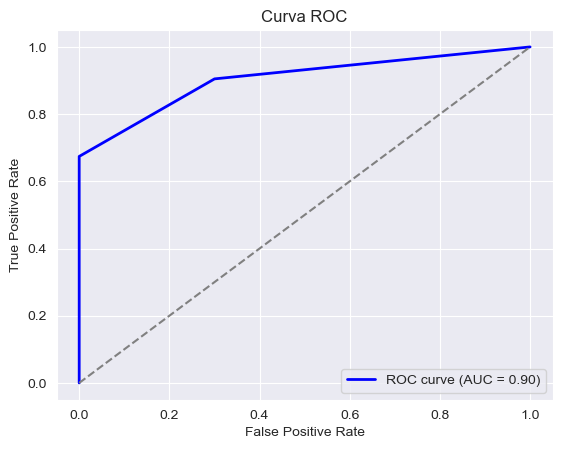

In [90]:
from sklearn.metrics import roc_curve, auc

y_scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Identidad
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

10. ¿Podemos decir que el modelo es bueno según su curva ROC? ¿Para que podemos usar esta visualización?

R: El área bajo la curva (AUC) es de 0.9, lo que indica que el modelo tiene una capacidad de discriminación alta, por lo tanto, el modelo es bueno según su curva ROC.
   La visualización ayuda a ver cómo de bien el modelo separa las clases positivas y negativas en distintos umbrales de decisión.

11. ¿Sería seguro usar este clasificador en un caso real diagnosicando pacientes?

R: Al tratarse de un clasificador que sería usado para diagnosticar pacientes, la curva ROC no sería una forma confiable de analizar aquel clasificador, pues no se está considerando los costos que podría tener un mal diagnóstico (no se sabe la matriz de costos). Como se dijo antes, en el 32,6% de los casos, el clasificador predice erróneamente que pacientes con diabetes no tienen diabetes, lo cual es algo grave y que en una matriz de costos aquel error tiene más peso que diagnosticar a un paciente sano que tiene diabetes por ejemplo.

Y eso es todo por hoy :)
